<a href="https://colab.research.google.com/github/KiranVarghese25/RL/blob/main/Lab2_2348525_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 - Implement Tracking Nonstationary Bandit Problem

# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Program

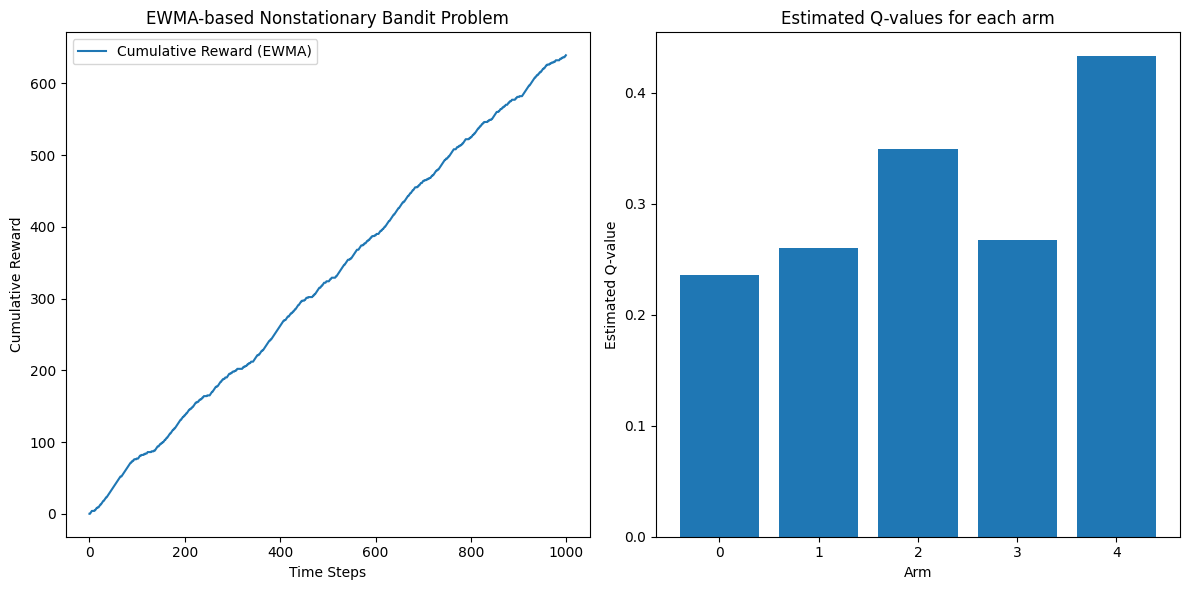

In [4]:
class NonStationaryBanditEWMA:
    def __init__(self, n_arms, epsilon, alpha):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.alpha = alpha
        self.q_values = np.zeros(n_arms)
        self.counts = np.zeros(n_arms)
        self.current_time = 0

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)
        else:
            return np.argmax(self.q_values)

    def update(self, arm, reward):
        self.q_values[arm] = self.q_values[arm] + self.alpha * (reward - self.q_values[arm])
        self.counts[arm] += 1
        self.current_time += 1

def simulate_ewma(n_arms=5, epsilon=0.1, alpha=0.1, time_steps=1000):
    bandit = NonStationaryBanditEWMA(n_arms, epsilon, alpha)

    true_probs = np.linspace(0.1, 0.9, n_arms)
    reward_history = []

    for t in range(time_steps):
        true_probs = 0.5 + 0.4 * np.sin(2 * np.pi * t / 200 + np.arange(n_arms))
        chosen_arm = bandit.select_arm()
        reward = np.random.rand() < true_probs[chosen_arm]

        bandit.update(chosen_arm, reward)
        reward_history.append(reward)

    return reward_history, bandit.q_values

reward_history, q_values = simulate_ewma()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.cumsum(reward_history), label='Cumulative Reward (EWMA)')
plt.xlabel('Time Steps')
plt.ylabel('Cumulative Reward')
plt.title('EWMA-based Nonstationary Bandit Problem')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(np.arange(len(q_values)), q_values)
plt.xlabel('Arm')
plt.ylabel('Estimated Q-value')
plt.title('Estimated Q-values for each arm')

plt.tight_layout()
plt.show()
